In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt



In [3]:
df1=pd.read_csv(r"C:\Users\JYOTHI\Downloads\titanic_with_nan.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [4]:
df_titan=df1.copy()
df_titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# Task:1 Data cleaning

In [5]:

df_titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             89
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        89
dtype: int64

# here from above we can see that there are 89 null values im age column and 687 null values in cabi column and 89 in Embarked column.

# Handling misssing data:

In [6]:
#finding the mean of the age column
avg_mean_age=df_titan["Age"].mean()
avg_mean_age

29.657148672436556

In [7]:
# filling the null values the mean of the age using fillna method
df_titan["Age"].fillna(avg_mean_age,inplace=True)

In [8]:
df_titan["Age"].isnull().sum()  #here we can now that there are no null values

0

In [9]:
#finding the most common port in the embarked column uisng mode as it gives most repeated element
most_common=df_titan["Embarked"].mode()[0]
most_common

'S'

In [10]:
df_titan["Embarked"].fillna(most_common,inplace=True) # filling null values in the embarked column

In [11]:
df_titan["Embarked"].isnull().sum() # here we can see that there are no null values

0

In [12]:
df_titan["Cabin"].fillna("Unknown",inplace=True) # filling null values with the "unknown")

In [13]:
df_titan["Cabin"].isnull().sum()

0

In [14]:
df_titan.isnull().sum() # as we filled the null values in the above ,so there are no null values present in the columns

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Duplicate handling:

In [15]:
duplicates=df_titan[df_titan.duplicated()]
duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# from above we can see that there are no duplicate  values as it returns a empty dataframe

# Task 2: Data Transformation

# Create a new feature

In [16]:
df_titan["FamilySize"]=df_titan["SibSp"]+df_titan["Parch"]+1

In [17]:
df_titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,29.657149,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.657149,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


#  Binarize the Age Column:


In [18]:
df_titan["Age"]=df_titan["Age"].astype(int)

In [19]:
df_titan["Age"].dtype

dtype('int32')

In [20]:
df_titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,29,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,Unknown,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1


In [21]:
df_titan["IsAdult"]=df_titan["Age"]>18

In [22]:
df_titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,2,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,True
2,3,1,3,"Heikkinen, Miss. Laina",female,29,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29,1,0,113803,53.1000,C123,S,2,True
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S,1,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,Unknown,S,4,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,True


# Task 3: Data Visualization


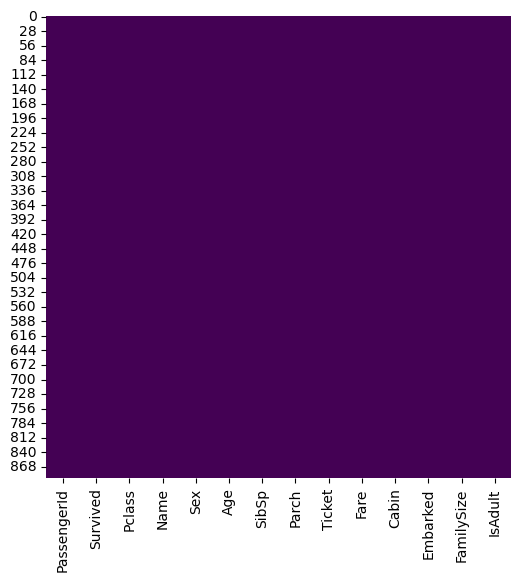

In [25]:
# Heatmap:
plt.figure(figsize=(6,6))
sns.heatmap(df_titan.isnull(),cbar=False,cmap="viridis")

plt.show()

Text(0.5, 1.0, 'bar plot showing the survival rate by Pclass')

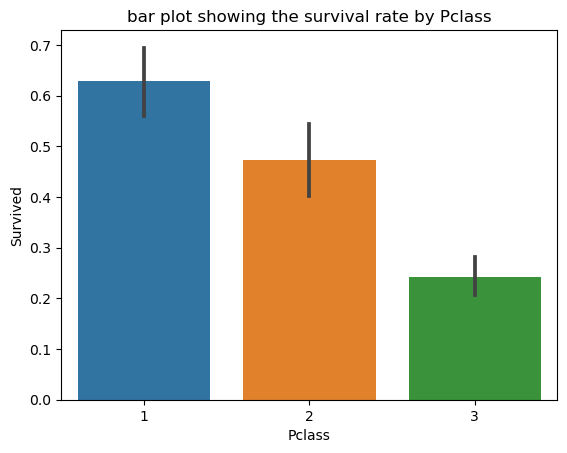

In [26]:
# bar plot
sns.barplot(x="Pclass",y="Survived",data=df_titan)
plt.title("bar plot showing the survival rate by Pclass")


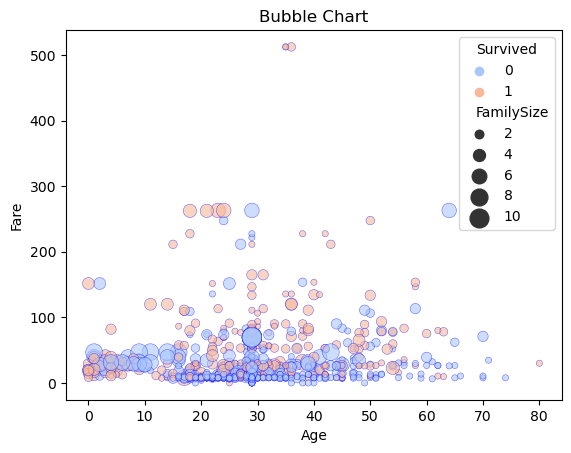

In [27]:
sns.scatterplot(data=df_titan,x="Age",y="Fare",size="FamilySize",hue="Survived",palette="coolwarm",edgecolor="b",sizes=(20,200),alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Bubble Chart")
plt.show()


C:\Users\JYOTHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JYOTHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


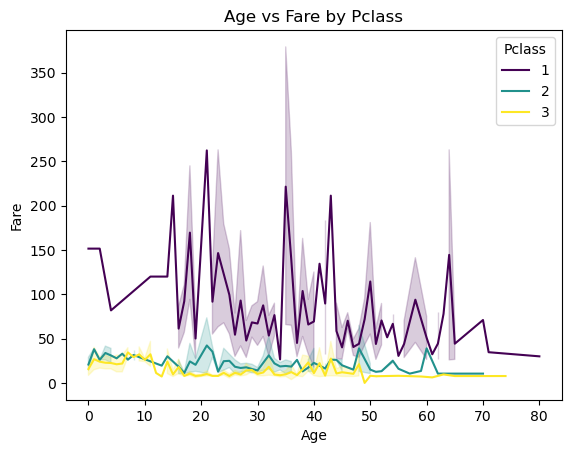

In [28]:
# Line Graph:
sns.lineplot(data=df_titan,x="Age",y="Fare",hue="Pclass",palette="viridis",dashes=False)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Pclass")
plt.show()


# Task 4: Descriptive Statistics

# Generate Summary Statistics:

In [29]:
df_titan[["Age","Fare","FamilySize"]].describe()

,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000
mean,29.454545,32.204208,1.904602
std,12.391412,49.693429,1.613459
min,0.000000,0.000000,1.000000
25%,23.000000,7.910400,1.000000
50%,29.000000,14.454200,1.000000
75%,34.000000,31.000000,2.000000
max,80.000000,512.329200,11.000000
